# Import

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle
import time

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV,ParameterGrid, cross_validate
from bayes_opt import BayesianOptimization

from sklearn.ensemble import RandomForestClassifier
from  xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import fbeta_score,roc_auc_score,confusion_matrix,recall_score

In [5]:
train = pd.read_csv('train.csv')
val = pd.read_csv('validation2.csv')
test = pd.read_csv('test2.csv')

In [6]:
y_train = np.array(train.TARGET)
train.drop(['TARGET'], axis = 1, inplace = True)
X_train = train.values

In [7]:
y_val = np.array(val.TARGET)
val.drop(['TARGET'], axis = 1, inplace = True)
X_val = val.values

In [8]:
std = StandardScaler()

In [24]:
def build_target_function(X_train, y_train, n_splits = 5) :
    def LGB_bayesian(learning_rate, n_estimators,
                    max_depth, min_child_weight, min_child_samples,
                    subsample, colsample_bytree,
                    reg_lambda, reg_alpha) :

        max_depth = int(round(max_depth))
        min_child_samples = int(round(min_child_samples))
        n_estimators = int(round(n_estimators))
        reg_lambda = 10**(-reg_lambda)
        reg_alpha = 10**(-reg_alpha)
        learning_rate = 10**(-learning_rate)
        
        smote = SMOTE(random_state = 42)
        skf = StratifiedKFold(random_state = 42, n_splits = n_splits, shuffle = True)
        
        auc = 0
        for train_index, val_index in skf.split(X_train, y_train):
            Xtr, Xval = X_train[train_index], X_train[val_index]
            Ytr, Yval = y_train[train_index], y_train[val_index]
            X_smote, y_smote = smote.fit_resample(Xtr, Ytr)
            
            model = LGBMClassifier(learning_rate = learning_rate, n_estimators = n_estimators,
                                max_depth = max_depth, min_child_weight = min_child_weight, min_child_samples = min_child_samples,
                                subsample = subsample, colsample_bytree = colsample_bytree,
                                reg_lambda = reg_lambda, reg_alpha = reg_alpha,
                                verbosity = -1)
            model.fit(X_smote, y_smote, verbose = -1)

            Ypred = model.predict(Xval)
            auc += fbeta_score(Yval, Ypred,3)
        
        return auc / n_splits
    return LGB_bayesian

In [25]:
bounds_LGB = {'learning_rate' : (0,4), 'n_estimators' : (500,3500),
                'max_depth' : (2,30), 'min_child_weight': (2,10), 'min_child_samples': (1,500),
                'subsample': (0.6,1), 'colsample_bytree':(0.6,1),
                'reg_lambda' : (0,4), 'reg_alpha':(0,4)}

In [26]:
target_function = build_target_function(X_train, y_train)
LGB_BO = BayesianOptimization(target_function, bounds_LGB)
LGB_BO.maximize(init_points=5, n_iter=10)
print(LGB_BO.max['target']) 

|   iter    |  target   | colsam... | learni... | max_depth | min_ch... | min_ch... | n_esti... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------


C:\Users\quent\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


C:\Users\quent\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


C:\Users\quent\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


C:\Users\quent\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


C:\Users\quent\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


|  1        |  0.03412  |  0.7766   |  1.857    |  11.14    |  105.9    |  8.237    |  2.806e+0 |  2.461    |  3.539    |  0.7147   |


C:\Users\quent\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\quent\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\quent\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\quent\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\quent\AppData\Roaming\Python\Python37\site-packages\skl

|  2        |  0.000111 |  0.9707   |  2.486    |  3.941    |  85.52    |  7.612    |  1.857e+0 |  2.604    |  0.8028   |  0.6239   |
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


C:\Users\quent\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


C:\Users\quent\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


C:\Users\quent\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


C:\Users\quent\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


C:\Users\quent\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


|  3        |  0.05797  |  0.9016   |  0.9348   |  21.03    |  479.0    |  6.994    |  2.741e+0 |  3.151    |  3.757    |  0.8264   |
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


C:\Users\quent\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


C:\Users\quent\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


C:\Users\quent\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


C:\Users\quent\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


C:\Users\quent\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


|  4        |  0.0      |  0.7426   |  2.801    |  20.53    |  32.56    |  5.516    |  1.171e+0 |  3.333    |  3.441    |  0.9369   |
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


C:\Users\quent\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


C:\Users\quent\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


C:\Users\quent\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


C:\Users\quent\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


C:\Users\quent\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


|  5        |  0.08776  |  0.7618   |  0.2434   |  27.47    |  129.7    |  5.104    |  810.0    |  2.081    |  3.768    |  0.7144   |
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


C:\Users\quent\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


C:\Users\quent\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


C:\Users\quent\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


C:\Users\quent\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


C:\Users\quent\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


|  6        |  0.05403  |  0.8963   |  0.7214   |  24.78    |  132.5    |  8.597    |  814.9    |  1.777    |  0.5466   |  0.8652   |
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


C:\Users\quent\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


C:\Users\quent\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


C:\Users\quent\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


C:\Users\quent\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


C:\Users\quent\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


|  7        |  0.0      |  0.7923   |  3.71     |  27.68    |  126.3    |  4.335    |  820.1    |  3.821    |  3.867    |  0.6293   |
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


C:\Users\quent\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


C:\Users\quent\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


C:\Users\quent\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


C:\Users\quent\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


C:\Users\quent\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


|  8        |  0.06709  |  0.9332   |  0.5377   |  22.69    |  135.5    |  9.073    |  817.6    |  0.04514  |  0.251    |  0.6506   |
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


C:\Users\quent\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


C:\Users\quent\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


C:\Users\quent\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


C:\Users\quent\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


C:\Users\quent\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


|  9        |  0.0      |  0.9672   |  3.113    |  24.84    |  132.3    |  2.775    |  803.6    |  3.868    |  1.923    |  0.8953   |
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


C:\Users\quent\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


C:\Users\quent\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


C:\Users\quent\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


C:\Users\quent\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


C:\Users\quent\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


|  10       |  0.08603  |  0.9948   |  0.3101   |  28.88    |  138.5    |  8.191    |  807.3    |  2.631    |  1.081    |  0.6001   |
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


C:\Users\quent\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


C:\Users\quent\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


C:\Users\quent\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


C:\Users\quent\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


C:\Users\quent\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


|  11       |  0.001562 |  0.9727   |  3.614    |  24.93    |  129.8    |  9.651    |  811.6    |  1.589    |  2.292    |  0.8003   |
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


C:\Users\quent\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


C:\Users\quent\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


C:\Users\quent\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


C:\Users\quent\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


C:\Users\quent\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


|  12       |  0.06261  |  0.9687   |  0.7611   |  18.07    |  477.7    |  2.532    |  2.741e+0 |  2.255    |  2.826    |  0.6143   |
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


C:\Users\quent\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


C:\Users\quent\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


C:\Users\quent\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


C:\Users\quent\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


C:\Users\quent\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


|  13       |  0.003802 |  0.9597   |  2.191    |  26.01    |  136.6    |  4.215    |  826.7    |  2.165    |  3.152    |  0.8601   |
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


C:\Users\quent\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


C:\Users\quent\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


C:\Users\quent\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


C:\Users\quent\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


C:\Users\quent\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


|  14       |  0.0285   |  0.6193   |  1.611    |  27.49    |  120.6    |  6.048    |  809.4    |  1.078    |  2.495    |  0.8631   |
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


C:\Users\quent\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


C:\Users\quent\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


C:\Users\quent\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


C:\Users\quent\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
|  15       |  0.0745   |  0.8949   |  0.437    |  18.74    |  489.2    |  3.816    |  2.745e+0 |  1.319    |  1.93     |  0.9241   |
0.08776295204117351


C:\Users\quent\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [27]:
LGB_BO.max['params']

{'colsample_bytree': 0.7618486694741439,
 'learning_rate': 0.24335530605989542,
 'max_depth': 27.472985385276438,
 'min_child_samples': 129.74502363072654,
 'min_child_weight': 5.104208879418903,
 'n_estimators': 809.9834653755213,
 'reg_alpha': 2.0811143718254352,
 'reg_lambda': 3.7680361490849936,
 'subsample': 0.7143953815799676}

In [28]:
smote = SMOTE(random_state = 42)

In [29]:
param = LGB_BO.max['params']
model = LGBMClassifier( learning_rate = 10**(-param['learning_rate']), n_estimators = int(round(param['n_estimators'])),
                        max_depth = int(round(param['max_depth'])), min_child_weight = param['min_child_weight'], 
                        min_child_samples = int(round(param['min_child_samples'])),
                        subsample = param['subsample'], colsample_bytree = param['colsample_bytree'],
                        reg_lambda = 10**(-param['reg_lambda']), reg_alpha = 10**(-param['reg_alpha']))
X_smote, y_smote = smote.fit_resample(X_train, y_train)
model.fit(X_smote, y_smote)

[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


LGBMClassifier(colsample_bytree=0.7618486694741439,
               learning_rate=0.5710112883770895, max_depth=27,
               min_child_samples=130, min_child_weight=5.104208879418903,
               n_estimators=810, reg_alpha=0.008296322543749467,
               reg_lambda=0.0001705940386852057, subsample=0.7143953815799676)

In [30]:
Ypred = model.predict_proba(X_val)[:,1]
roc_auc_score(y_val, Ypred)

0.8214110657083622

In [31]:
max_predi = (model.predict_proba(X_val)[:,1] >=0.5) .astype(bool)

Text(0.5, 51.0, 'Predicted Label')

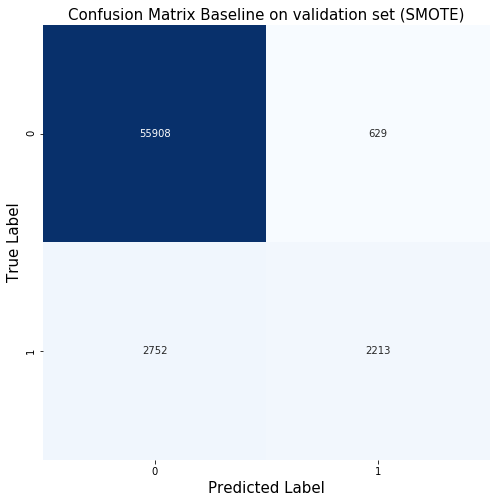

In [32]:
cm = confusion_matrix(y_val,
                      max_predi)

plt.figure(figsize=(8,8))
plt.title('Confusion Matrix Baseline on validation set (SMOTE)',fontsize=15)
f = sns.heatmap(cm,
                cmap='Blues',
                cbar=False,
                annot=True,
                fmt='g')
f.set_ylabel('True Label',fontsize=15)
f.set_xlabel('Predicted Label',fontsize=15)